### Visualizing initial results of running BET. runs only on cdt-laptop
bet2 tool run on wmh singapore 50 image.

In [68]:
import numpy as np
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import os

In [49]:
source_folder = "/media/benp/NVMEspare/datasets/MRI_IP_project/WMH_challenge_dataset/public/Singapore/50/"
bet_folder = "/media/benp/NVMEspare/datasets/preprocessing_attempts/wmh/singapore/50/"
bet_pre = bet_folder + "pre/"
bet_orig = bet_folder + "orig/"
source_pre = source_folder + "pre/"
source_orig = source_folder + "orig/"
folder_map = {"source/pre":source_pre, "source/orig":source_orig, "bet/pre":bet_pre, "bet/orig":bet_orig}

In [50]:
init_flair = source_pre + "FLAIR.nii.gz"

In [51]:
image_obj = nib.load(init_flair)

In [52]:
type(image_obj)

nibabel.nifti1.Nifti1Image

In [53]:
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [54]:
height, width, depth = image_data.shape
print(f"The image object has the following dimensions:\nheight={height}\nwidth={width}\ndepth={depth}")
image_data.shape

The image object has the following dimensions:
height=256
width=232
depth=48


(256, 232, 48)

### Plotting the results of bet

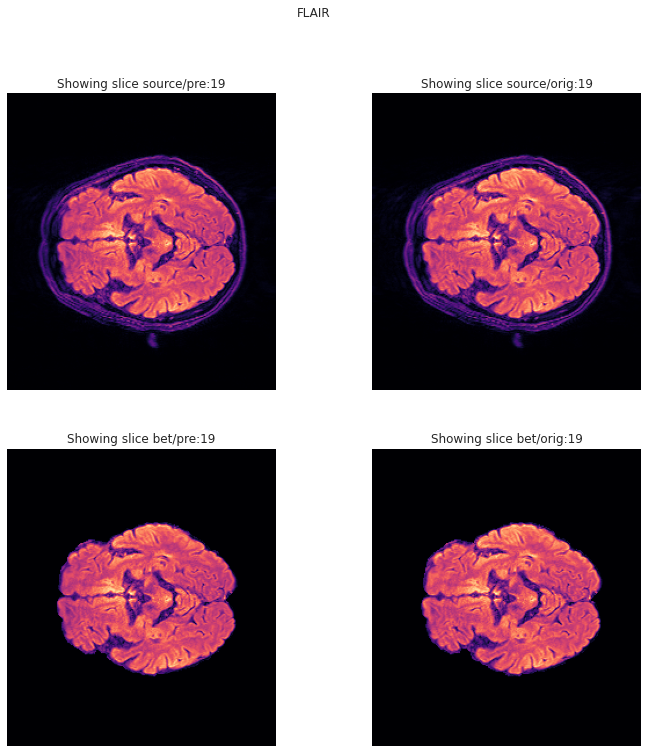

In [66]:
fig= plt.figure(figsize=(12,12))
for i, (short_name, folder) in enumerate(folder_map.items()):
    # load the image
    flair_file = folder + "FLAIR.nii.gz"
    image_obj = nib.load(flair_file)
    image_data = image_obj.get_fdata()
    
    # plot the image
    islice = 19
    plt.subplot(2, 2, i+1)
    plt.imshow(image_data[:,:,islice], cmap="magma")
    plt.title(f"Showing slice {short_name}:{islice}")
    plt.axis('off')
fig.suptitle("FLAIR")
plt.show()

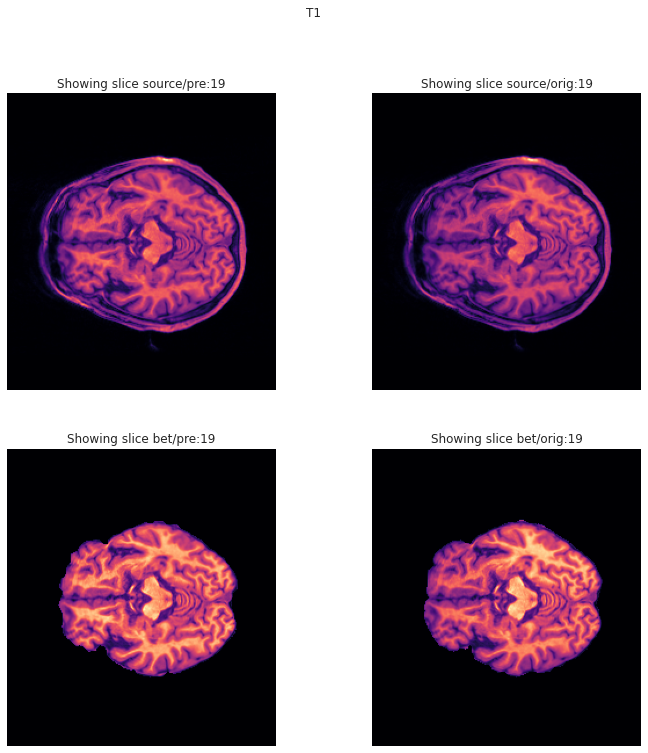

In [67]:
fig= plt.figure(figsize=(12,12))
for i, (short_name, folder) in enumerate(folder_map.items()):
    # load the image
    flair_file = folder + "T1.nii.gz"
    image_obj = nib.load(flair_file)
    image_data = image_obj.get_fdata()
    
    # plot the image
    islice = 19
    plt.subplot(2, 2, i+1)
    plt.imshow(image_data[:,:,islice], cmap="magma")
    plt.title(f"Showing slice {short_name}:{islice}")
    plt.axis('off')
fig.suptitle("T1")
plt.show()

### What's the difference between pre and orig?

from the sum below clearly quite a bit, they are not the same.....
exactly whats what for now is somewhat besides the point, I just need to get an approximately similar preprocessing pipeline to train some initial models with....

In [56]:
flairs = {}
for i, (short_name, folder) in enumerate(folder_map.items()):
    # load the image
    flair_file = folder + "FLAIR.nii.gz"
    image_obj = nib.load(flair_file)
    image_data = image_obj.get_fdata()
    
    flairs[short_name] = image_data

In [58]:
np.sum(flairs['source/pre'] - flairs['source/orig'])

-14776258.490013957

### What else is in the orig folder?

So, it looks like they have already run something like BET, I wonder how different the images are between theirs and my BET extraction.

from the below, it is exactly the same as the result on the orig folder, but quite different to
the result from the pre folder, even though they look quite different to me.

In [69]:
os.listdir(source_orig)

['3DT1.nii.gz',
 '3DT1_mask.nii.gz',
 'FLAIR.nii.gz',
 'FLAIR_brain.nii.gz',
 'reg_3DT1_to_FLAIR.txt',
 'T1.nii.gz']

(-0.5, 231.5, 255.5, -0.5)

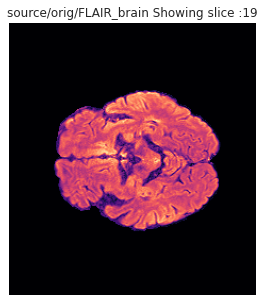

In [81]:
flair_brain_file = source_orig + "FLAIR_brain.nii.gz"
image_brain_obj = nib.load(flair_brain_file)
image_brain_data = image_brain_obj.get_fdata()

# plot the image
islice = 19
plt.figure(figsize=(5,5))
plt.imshow(image_brain_data[:,:,islice], cmap="magma")
plt.title(f"source/orig/FLAIR_brain Showing slice :{islice}")
plt.axis('off')

In [84]:
# difference between bet applied to orig flair and the flair_brain file

flair_file = bet_orig + "FLAIR.nii.gz"
image_obj = nib.load(flair_file)
image_data = image_obj.get_fdata()

np.sum(image_data - image_brain_data)
# plot the image
# islice = 19
# plt.figure(figsize=(5,5))
# plt.imshow(image_data[:,:,islice], cmap="magma")
# plt.title(f"bet/orig Showing slice :{islice}")
# plt.axis('off')

0.0

In [85]:
# difference between bet applied to pre flair and the flair_brain file
flair_file = bet_pre + "FLAIR.nii.gz"
image_obj = nib.load(flair_file)
image_data = image_obj.get_fdata()

np.sum(image_data - image_brain_data)

-9236999.395790398

### Image of a segmentation mask

(-0.5, 231.5, 255.5, -0.5)

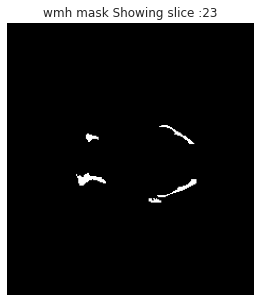

In [89]:

flair_file = source_folder + "wmh.nii.gz"
image_obj = nib.load(flair_file)
image_data = image_obj.get_fdata()

# plot the image
islice = 23
plt.figure(figsize=(5,5))
plt.imshow(image_data[:,:,islice], cmap="gray")
plt.title(f"wmh mask Showing slice :{islice}")
plt.axis('off')